# Parameter Evaluation

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# helper function for viewing a list of passed in sample images
def view_samples_2(epoch, samples, train_num):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))
    fig.savefig('image_sets/train_' + str(train_num) + '.png')

In [3]:
# helper function for viewing a list of passed in sample images
def view_plots(train_runs, title, param):
    number_of_pots = len(train_runs)
    train_run_list = [m[0] for m in train_runs]
    param_list = [m[1] for m in train_runs]
    epochs_calc = [m[2] for m in train_runs]
    
    ax_set = ('a' + str(m) for m in range(number_of_pots))
    
    fig, ax_set = plt.subplots(figsize=(16,4), nrows=1, ncols=number_of_pots)
    fig.suptitle(title)
    for ii,train_num in enumerate(train_run_list):
        df = pd.read_excel('training_results/train_' + str(train_num) + '_' + str(param_list[ii]) + '.xlsx')  # doctest: +SKIP
        loss_d = df['Discriminator'].values
        loss_g = df['Generator'].values
        ax_set[ii].plot(df.index/epochs_calc[ii], loss_d, label='Discriminator')
        ax_set[ii].plot(df.index/epochs_calc[ii], loss_g, label='Generator')
        ax_set[ii].set_title('Train_' + str(train_num))
        #ax_set[ii].xlabel('n_epochs', fontsize=14)
        #ax_set[iniidex].ylabel('loss', fontsize=14)
        ax_set[ii].legend()
        
    fig.savefig('plots/train_' + str(param) + '.png')

In the following section the parameter tuning which was investigated in separated training runs is appended. 

## Parameter: n_epochs

Parameters          | 1st Train-Run | 2nd Train-Run | 3rd Train-Run | 4th Train-Run | 5th Train-Run | 6th Train-Run |
----------          | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
batch_size          |   128         |   128         |   128         |   128         |   128         |   128         |
img_size            |   32          |   32          |   32          |   32          |   32          |   32          |
deconv-layers       |   3           |   3           |   3           |   3           |   3           |   3           |
conv-layers         |   3           |   3           |   3           |   3           |   3           |   3           |
d_conv_dim          |   32          |   32          |   32          |   32          |   32          |   32          |
g_conv_dim          |   32          |   32          |   32          |   32          |   32          |   32          |
z_size              |   100         |   100         |   100         |   100         |   100         |   100         |
lr                  |   0.001       |   0.001       |   0.001       |   0.001       |   0.001       |   0.001       |  
beta1               |   0.5         |   0.5         |   0.5         |   0.5         |   0.5         |   0.5         |
beta2               |   0.999       |   0.999       |   0.999       |   0.999       |   0.999       |   0.999       |
dropout             |   no          |   no          |   no          |   no          |   no          |   no          |
**n_epochs**        |   `1`         |   `10`        |   `50`        |   `100`       |   `500`       |   `1000`      |

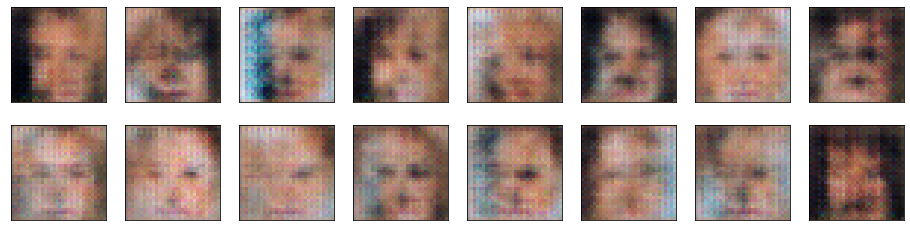

In [4]:
# n_epochs = 1
train_num = 1
param = 'num_epochs'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

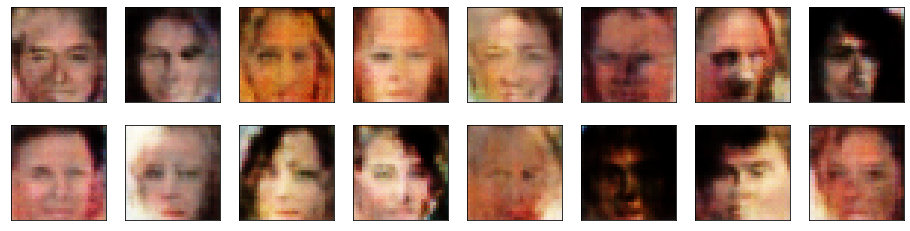

In [5]:
# n_epochs = 10
train_num = 2
param = 'num_epochs'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

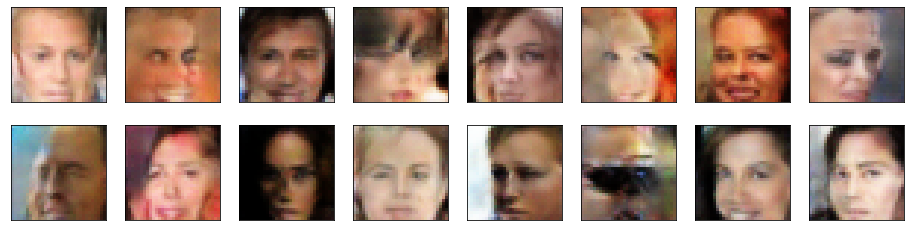

In [6]:
# n_epochs = 50
train_num = 3
param = 'num_epochs'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

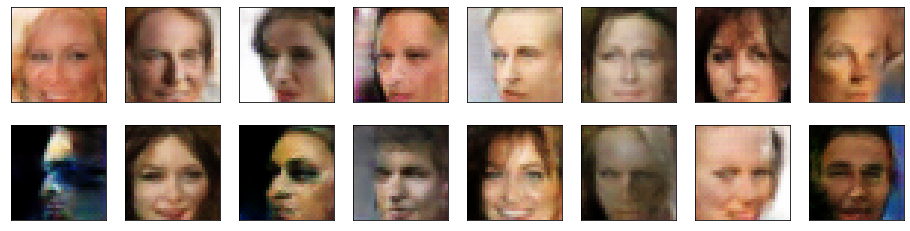

In [7]:
# n_epochs = 100
train_num = 4
param = 'num_epochs'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

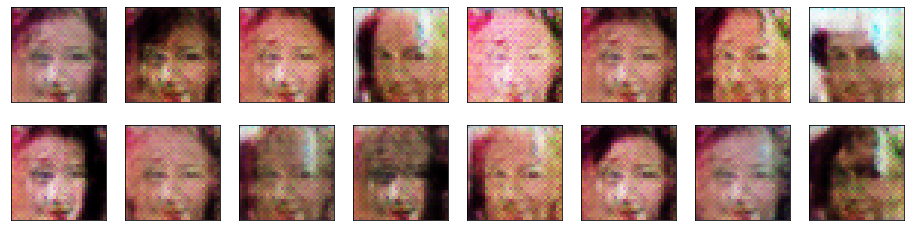

In [8]:
# n_epochs = 500
train_num = 5
param = 'num_epochs'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

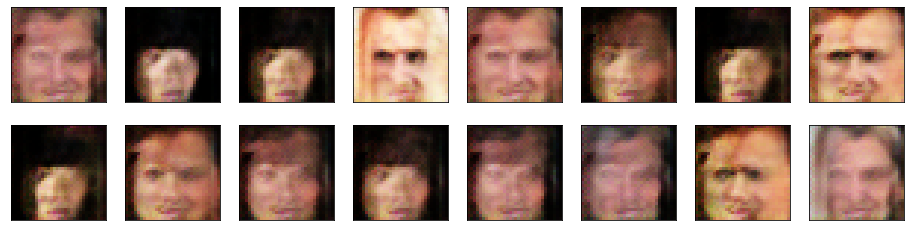

In [9]:
# n_epochs = 1000
train_num = 6
param = 'num_epochs'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

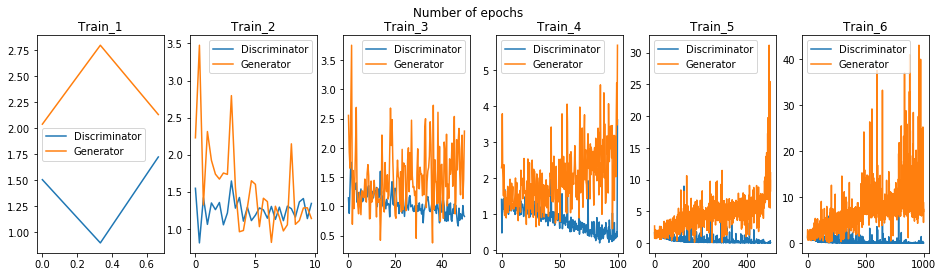

In [10]:
view_plots([[1, 'num_epochs', 3],
            [2, 'num_epochs', 3],
            [3, 'num_epochs', 3],
            [4, 'num_epochs', 3],
            [5, 'num_epochs', 3],
            [6, 'num_epochs', 3]], 'Number of epochs', 'n_epochs')    

### Result for parameter n_epochs:
Best value setting for the number of epochs extends to the range 50...100. Lower epoch values lead to underfitting, higher epoch values tend to pronounced noisy behavior of the discriminator loss. In both regimes the generated face images are blurred. In the following 100 epochs will be used for further parameter studies.

## Parameter: number of conv-layers and deconv-layers	

Parameters          | 4th Train-Run | 8th Train-Run | 
----------          | ------------- | ------------- |
batch_size          |   128         |   128         |  
img_size            |   32          |   32          | 
**deconv-layers**   |   `3`         |   `4`         |
**conv-layers**     |   `3`         |   `4`         | 
d_conv_dim          |   32          |   32          |
g_conv_dim          |   32          |   32          | 
z_size              |   100         |   100         |  
lr                  |   0.001       |   0.001       |  
beta1               |   0.5         |   0.5         | 
beta2               |   0.999       |   0.999       |
dropout             |   no          |   no          |
n_epochs            |   100         |   100         |

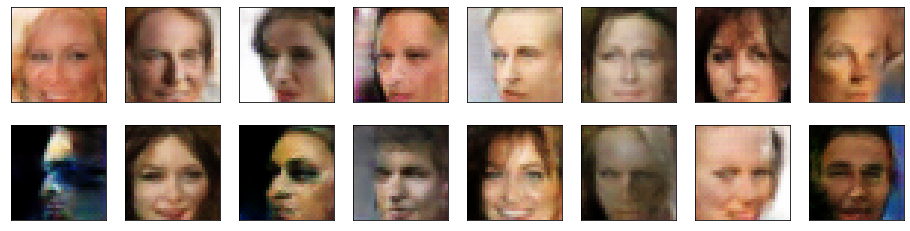

In [11]:
# conv-layers=3 and deconv-layers=3
train_num = 4
param = 'num_epochs'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

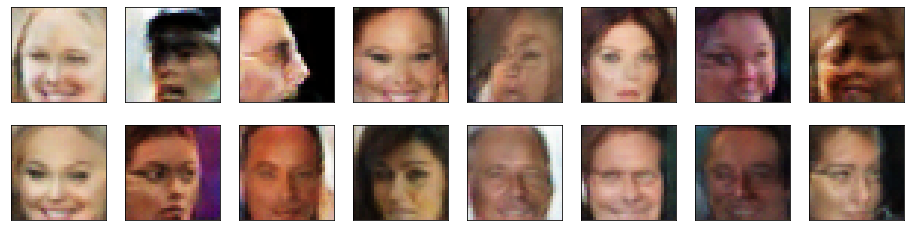

In [12]:
# conv-layers=4 and deconv-layers=4
train_num = 8
param = 'conv_deconv'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

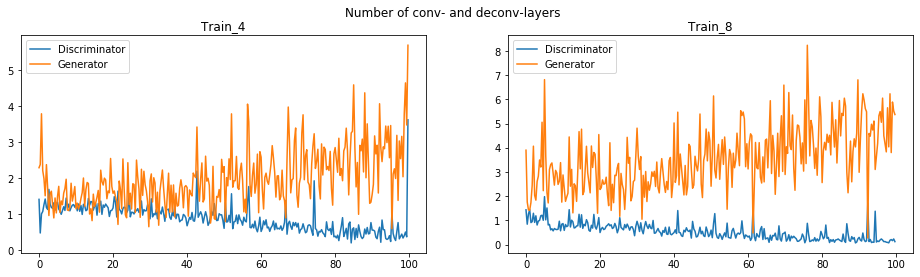

In [13]:
view_plots([[4, 'num_epochs', 3],
            [8, 'conv_deconv', 3]],'Number of conv- and deconv-layers', 'conv_deconv')    

### Result for parameter number of conv-layers and deconv-layers:
There is no clear trend with regard to the number of conv-layers and deconv-layers. Corresponding images for conv-layers=3 and deconv-layers=3 look similar to conv-layers=4 and deconv-layers=4. However, the trend of losses is slightly better for conv-layers=4 and deconv-layers=4, higher (positive) loss for the Generator and slightly lower loss for the Discriminator. In the following conv-layers=4 and deconv-layers=4 will be used for further parameter studies.

## Parameter: batch_size

Parameters          | 14th Train-Run | 15th Train-Run | 16th Train-Run  | 17th Train-Run |
----------          | ------------- | -------------   | -------------   | -------------  |
**batch_size**      |   `64`        |   `128`         |   `256`         |  `512`         |   
img_size            |   32          |   32            |   32            |   32           |
deconv-layers       |   4           |   4             |   4             |   4            |
conv-layers         |   4           |   4             |   4             |   4            |
d_conv_dim          |   32          |   32            |   32            |   32           |   
g_conv_dim          |   32          |   32            |   32            |   32           |
z_size              |   100         |   100           |   100           |   100          |   
lr                  |   0.001       |   0.001         |   0.001         |   0.001        |  
beta1               |   0.5         |   0.5           |   0.5           |   0.5          |
beta2               |   0.999       |   0.999         |   0.999         |   0.999        |
dropout             |   no          |   no            |   no            |   no           |
n_epochs            |   100         |   100           |   100           |   100          |

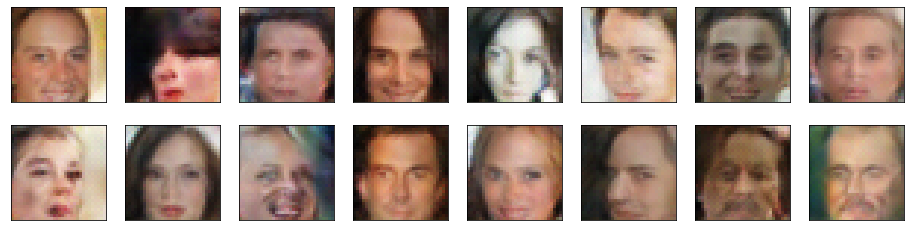

In [14]:
# batch_size=64
train_num = 14
param = 'batch_size'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

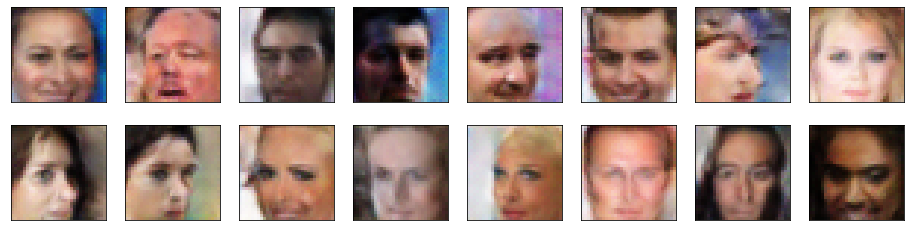

In [15]:
# batch_size=128
train_num = 15
param = 'batch_size'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

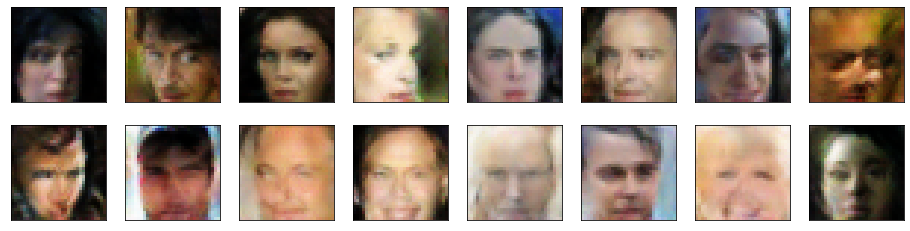

In [16]:
# batch_size=256
train_num = 16
param = 'batch_size'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

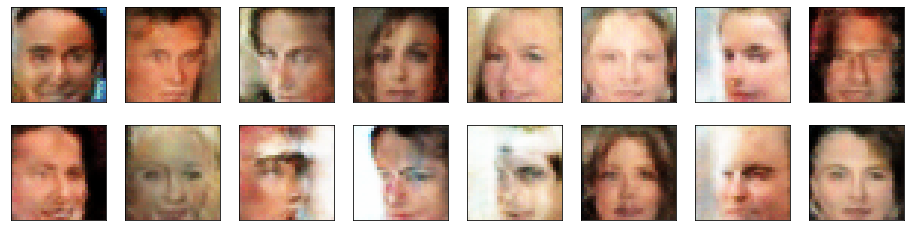

In [17]:
# batch_size=512
train_num = 17
param = 'batch_size'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

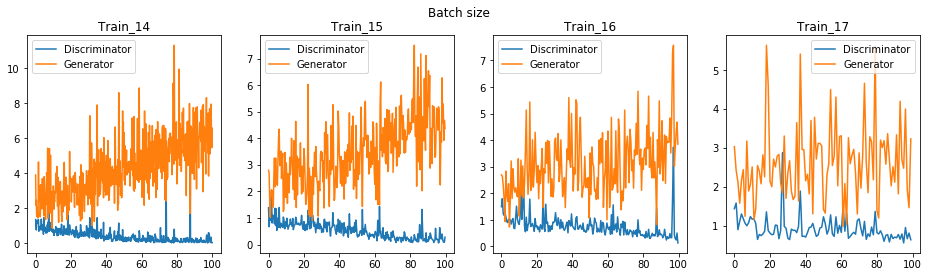

In [18]:
view_plots([[14, 'batch_size', 5],
            [15, 'batch_size', 3],
            [16, 'batch_size', 2],
            [17, 'batch_size', 1]], 'Batch size', 'batch_size') 

#### Result for parameter batch_size:
A larger batch_size has a positive effect on the computational boost. However, if the batch_size is getting too high the feature resolution is getting worse. This can be clearly seen if one compares a batch_size of 512 with a batch_size of 128. For the further study a batch_size of 128 has been chosen.

## Parameter: conv_dim

Parameters          | 8th Train-Run | 11th Train-Run  | 12th Train-Run  | 13th Train-Run |
----------          | ------------- | -------------   | -------------   | -------------  |
batch_size          |   128         |   128           |   128           |  128           |   
img_size            |   32          |   32            |   32            |   32           |
deconv-layers       |   4           |   4             |   4             |   4            |
conv-layers         |   4           |   4             |   4             |   4            |
**d_conv_dim**      |   `32`        |   `64`          |   `128`         |  `256`         |   
**g_conv_dim**      |   `32`        |   `64`          |   `128`         |  `256`         |
z_size              |   100         |   100           |   100           |   100          |   
lr                  |   0.001       |   0.001         |   0.001         |   0.001        |  
beta1               |   0.5         |   0.5           |   0.5           |   0.5          |
beta2               |   0.999       |   0.999         |   0.999         |   0.999        |
dropout             |   no          |   no            |   no            |   no           |
n_epochs            |   100         |   100           |   100           |   100          |

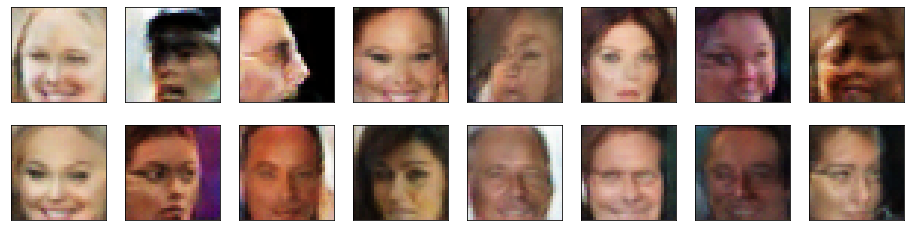

In [19]:
# d_conv_dim=32 and g_conv_dim=32
train_num = 8
param = 'conv_deconv'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

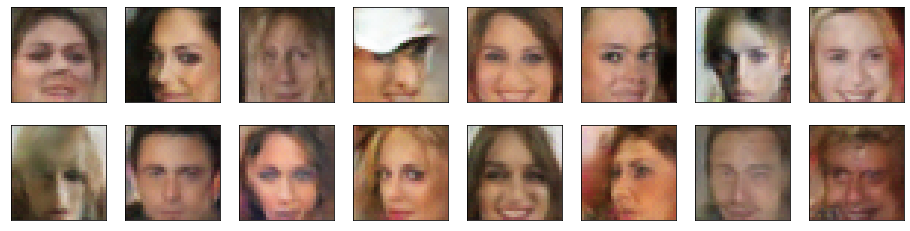

In [20]:
# d_conv_dim=64 and g_conv_dim=64
train_num = 11
param = 'conv_dim'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

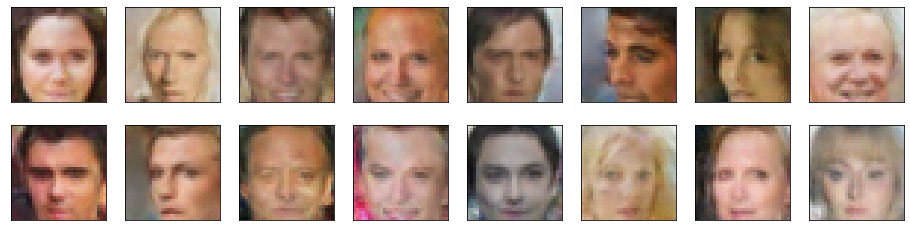

In [21]:
# d_conv_dim=128 and g_conv_dim=128
train_num = 12
param = 'conv_dim'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

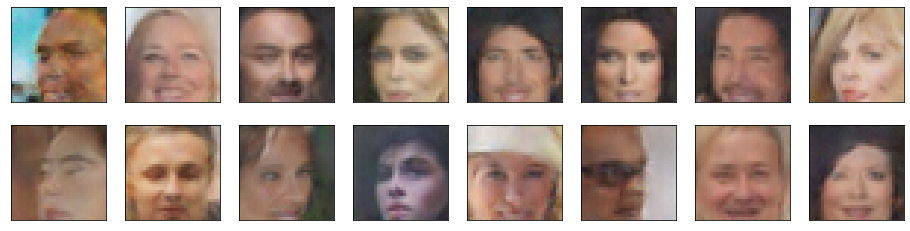

In [22]:
# d_conv_dim=256 and g_conv_dim=256
train_num = 13
param = 'conv_dim'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

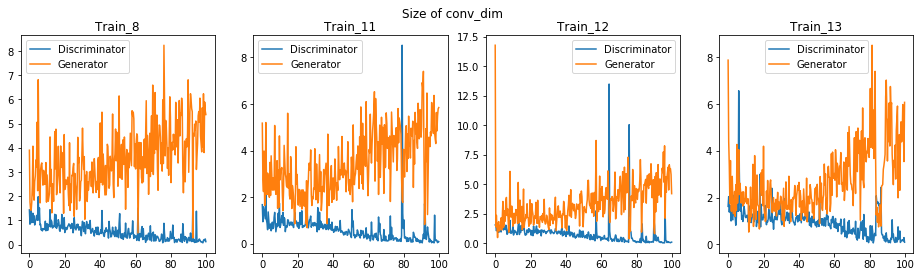

In [23]:
view_plots([[8, 'conv_deconv', 3],
            [11, 'conv_dim', 3],
            [12, 'conv_dim', 3],
            [13, 'conv_dim', 3]], 'Size of conv_dim', 'conv_dim') 

#### Result for parameter conv_dim:
With a higher conv_dim for the Generator and the Discriminator the resolution of feature details is getting higher. For example, eyes are better resolved with a conv_dim=256 than with a conv_dim=32. However, even a conv_dim of 64 leads to convincing results.

### Parameter: lr

Parameters          | 21th Train-Run | 14th Train-Run  | 22th Train-Run |
----------          | ------------- | -------------   | -------------   |
batch_size          |   128         |   128           |   128           |   
img_size            |   32          |   32            |   32            |   
deconv-layers       |   4           |   4             |   4             |   
conv-layers         |   4           |   4             |   4             |   
d_conv_dim          |   64          |   64            |   64            |    
g_conv_dim          |   64          |   64            |   64            |   
z_size              |   100         |   100           |   100           |    
**lr**              |   `0.01`      |   `0.001`       |   `0.0001`      |   
beta1               |   0.5         |   0.5           |   0.5           |   
beta2               |   0.999       |   0.999         |   0.999         |   
dropout             |   no          |   no            |   no            |   
n_epochs            |   100         |   100           |   100           | 

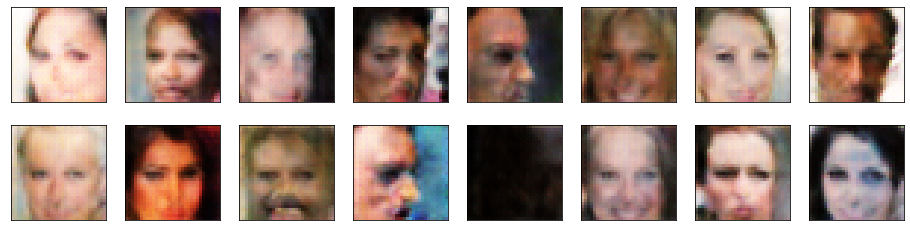

In [24]:
# lr=0.01
train_num = 21
param = 'lr'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

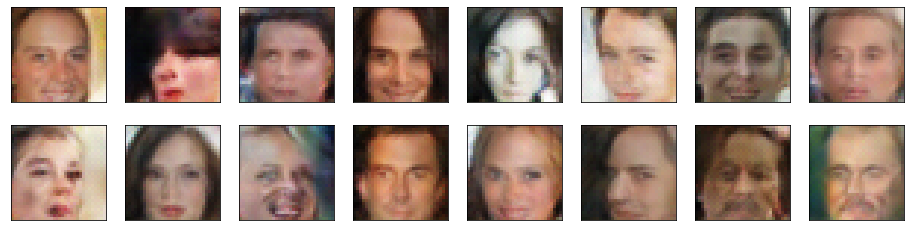

In [25]:
# lr=0.001
train_num = 14
param = 'batch_size'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

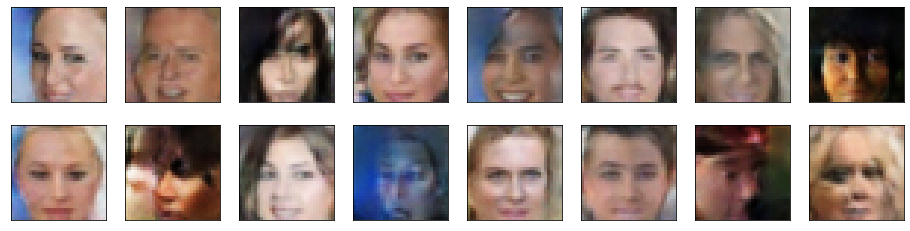

In [26]:
# lr=0.0001
train_num = 22
param = 'lr'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

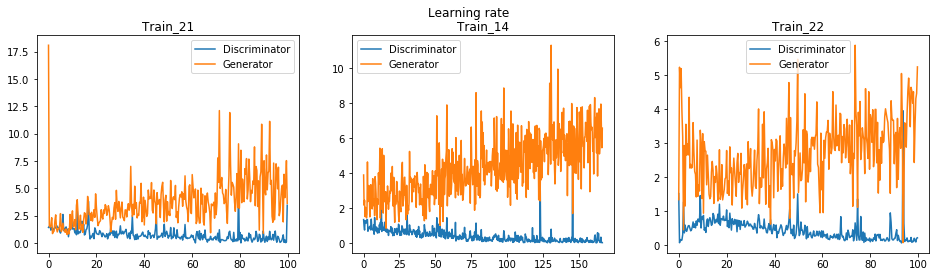

In [27]:
view_plots([[21, 'lr', 3],
            [14, 'batch_size', 3],
            [22, 'lr', 3]], 'Learning rate', 'lr')

#### Result for parameter lr:
Learning rates in the range between 0.01 and 0.0001 were tested. In all three cases the GAN is able to learn and generated fake images of faces are successfully constructed. However,  a of lr=0.001 or lr=0.0001 lead to a slightly better feature resolution than lr = 0.01.

### Reasonable hyperparameter setting
The following table shows the best-of setting of the investigated parameter tuning.

Parameters          | 14th Train-Run|
----------          | ------------- |
batch_size          |   128         |  
img_size            |   32          |  
deconv-layers       |   4           |  
conv-layers         |   4           |  
d_conv_dim          |   64          |    
g_conv_dim          |   64          |  
z_size              |   100         |  
lr                  |   0.001       |   
beta1               |   0.5         |   
beta2               |   0.999       |     
dropout             |   no          |   
n_epochs            |   100         | 

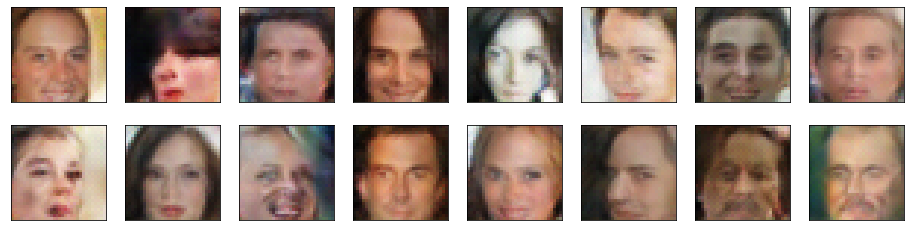

In [28]:
# reasonable setting
train_num = 14
param = 'batch_size'
with open('training_results/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
    samples = pkl.load(f)
_ = view_samples_2(-1, samples, train_num)

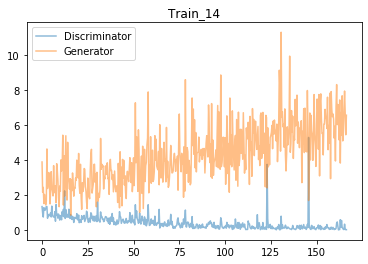

In [35]:
train_num = 14
param = 'batch_size'
fig, ax = plt.subplots()
df = pd.read_excel('training_results/train_' + str(train_num) + '_' + str(param) + '.xlsx')  # doctest: +SKIP
loss_d = df['Discriminator'].values
loss_g = df['Generator'].values
plt.plot(df.index/3, loss_d, label='Discriminator', alpha=0.5)
plt.plot(df.index/3,loss_g, label='Generator', alpha=0.5)
plt.title("Train_14")
plt.legend()
fig.savefig('plots/train_14_single.png')

### Reasons for the chosen final hyperparameter setting:

#### n_epochs:
This parameter was varied between 1 and 1000. The best value setting for n_epochs extends to the range 50...100. Lower epoch values lead to underfitting, higher epoch values tend to pronounced noisy behavior of the discriminator loss. For both regimes the generated face images are blurred. Therefore n_epochs was set to 100.

#### number of conv-layers and deconv-layers:
Two models were constructed: one with 3 and another with 4 conv and deconv layers for the discriminator and generator, respectively. Corresponding images for conv-layers=3 and deconv-layers=3 look similar to conv-layers=4 and deconv-layers=4. Hence, a clear trend is hard to distinguish in these examples. However, the trend of losses is slightly better for conv-layers=deconv-layers=4 than for conv-layers=deconv-layers=3, i.e. higher (positive) loss for the Generator and slightly lower loss for the Discriminator. Therefore conv-layers=4 and deconv-layers=4 have been used for further parameter studies.

#### batch_size:
The batch_size was varied between 64 and 512. A larger batch_size has a positive effect on the computational boost. However, if the batch_size is getting too high the feature resolution is getting worse. This can be clearly seen if one compares a batch_size of 512 with a batch_size of 128. Therefore a batch_size of 128 has been chosen.

##### conv_dim:
The conv_dim value was investigated in the range between 32 and 256. With a higher conv_dim for the Generator and the Discriminator the resolution of feature details is getting higher. For example, eyes are better resolved with a conv_dim=256 than with a conv_dim=32. However, even a conv_dim of 64 leads to convincing results.

#### lr:
Learning rates in the range between 0.01 and 0.0001 were tested. In all three cases the GAN is able to learn and generated fake images of faces are successfully constructed. However, a of lr=0.001 or lr=0.0001 lead to a slightly better feature resolution than lr = 0.01.